# **AUTOMATIC WINDOW BLINDS OR CURTAIN CONTROL SYSTEM**

In [1]:
from fuzzylogic.classes import Domain, Set, Rule
from fuzzylogic.functions import triangular, S, R, trapezoid
from matplotlib import pyplot
pyplot.rc("figure", figsize=(10,5))

### PLOTTING THE MEMBERSHIP FUNCTION OF EACH LINGUISTIC VARIABLE FOR LIGHT INTENSITY

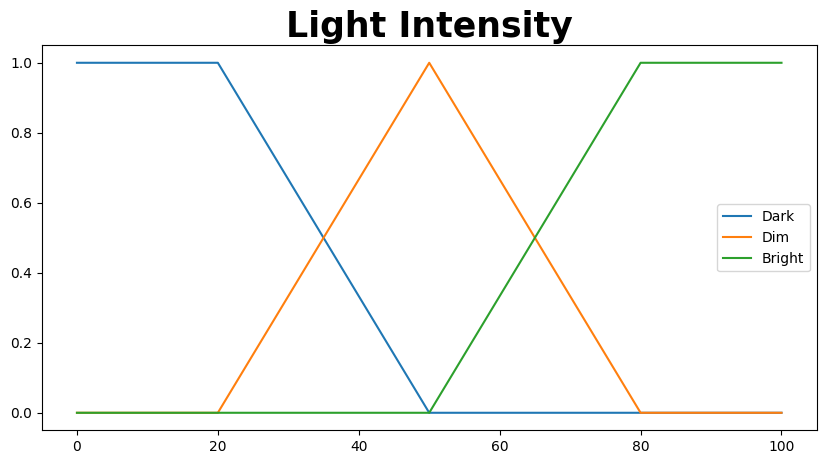

In [2]:
LI = Domain("light_intensity", 0, 100, res=0.1)

LI.dark = S(20, 50)
LI.dim = triangular(20, 80, c=50, c_m=1, no_m=0)
LI.bright = trapezoid(50, 80, 100, 110)

LI.dark.plot()
LI.dim.plot()
LI.bright.plot()

pyplot.legend(["Dark", "Dim", "Bright"], loc = "right")
pyplot.title("Light Intensity", fontweight='bold', fontsize=25)
pyplot.show()

### PLOTTING THE MEMBERSHIP FUNCTION OF EACH LINGUISTIC VARIABLE FOR TIME OF DAY

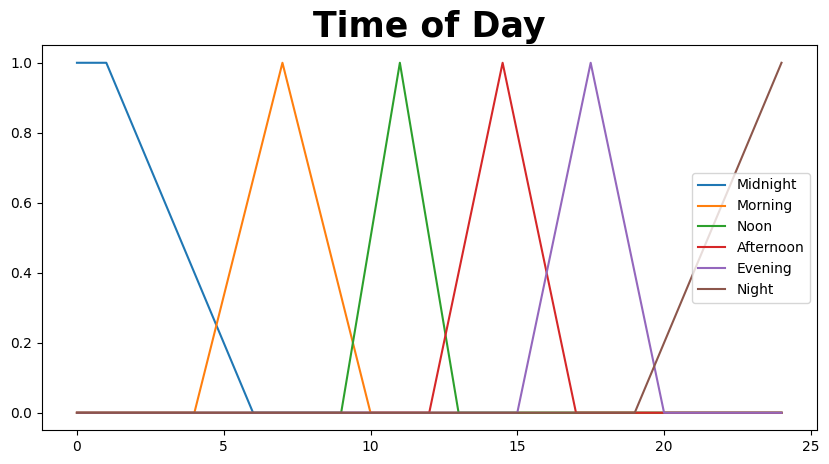

In [3]:
TD = Domain("time_of_day", 0, 24, res=0.1)

TD.midnight = S(1,6)
TD.morning = triangular(4, 10, c=7, c_m=1, no_m=0)
TD.noon = triangular(9, 13, c=11, c_m=1, no_m=0)
TD.afternoon = triangular(12, 17, c=14.5, c_m=1, no_m=0)
TD.evening = triangular(15, 20, c=17.5, c_m=1, no_m=0)
TD.night = R(19,24)

TD.midnight.plot()
TD.morning.plot()
TD.noon.plot()
TD.afternoon.plot()
TD.evening.plot()
TD.night.plot()

pyplot.legend(["Midnight", "Morning", "Noon", "Afternoon", "Evening", "Night"], loc = "right")
pyplot.title("Time of Day", fontweight='bold', fontsize=25)
pyplot.show()

### PLOTTING THE MEMBERSHIP FUNCTION OF EACH LINGUISTIC VARIABLE FOR POSITION OF BLINDS

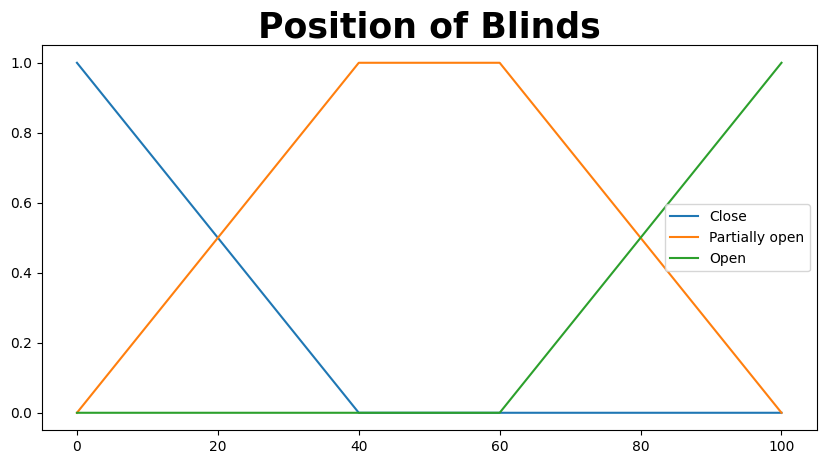

In [4]:
PB = Domain("position_of_blinds", 0, 100, res=0.1)

PB.close = S(0, 40)
PB.partially_open = trapezoid(0, 40, 60, 100)
PB.open = R(60, 100)

PB.close.plot()
PB.partially_open.plot()
PB.open.plot()

pyplot.legend(["Close", "Partially open", "Open"], loc = "right")
pyplot.title("Position of Blinds", fontweight='bold', fontsize=25)
pyplot.show()

# **DEFINING THE RULE BASE**

In [5]:
rules = []

rules.append(Rule({(LI.dark, TD.midnight):PB.close}))
rules.append(Rule({(LI.dark, TD.morning):PB.partially_open}))
rules.append(Rule({(LI.dark, TD.noon):PB.partially_open}))
rules.append(Rule({(LI.dark, TD.afternoon):PB.partially_open}))
rules.append(Rule({(LI.dark, TD.evening):PB.close}))
rules.append(Rule({(LI.dark, TD.night):PB.close}))

rules.append(Rule({(LI.dim, TD.midnight):PB.close}))
rules.append(Rule({(LI.dim, TD.morning):PB.partially_open}))
rules.append(Rule({(LI.dim, TD.noon):PB.open}))
rules.append(Rule({(LI.dim, TD.afternoon):PB.partially_open}))
rules.append(Rule({(LI.dim, TD.evening):PB.partially_open}))
rules.append(Rule({(LI.dim, TD.night):PB.close}))

rules.append(Rule({(LI.bright, TD.midnight):PB.close}))
rules.append(Rule({(LI.bright, TD.morning):PB.open}))
rules.append(Rule({(LI.bright, TD.noon):PB.partially_open}))
rules.append(Rule({(LI.bright, TD.afternoon):PB.partially_open}))
rules.append(Rule({(LI.bright, TD.evening):PB.partially_open}))
rules.append(Rule({(LI.bright, TD.night):PB.close}))

## **RULES**

|         |   **DARK**   |   **DIM**    |  **BRIGHT**  |
| ------- | -------- | -------- | -------- |
| **MIDNIGHT**     | CLOSE | CLOSE | CLOSE |
| **MORNING**| PARTIALLY OPEN | PARTIALLY OPEN| OPEN |
| **NOON**    | PARTIALLY OPEN | OPEN | PARTIALLY OPEN |
| **AFTERNOON**    | PARTIALLY OPEN| PARTIALLY OPEN | PARTIALLY OPEN |
| **EVENING**    | CLOSE| PARTIALLY OPEN | PARTIALLY OPEN |
| **NIGHT**    | CLOSE| CLOSE | CLOSE |

### **INFERENCE ENGINE**

In [6]:
intensity_input = float(input("Enter light intensity input (0-100): "))
time_of_day = float(input("Enter time of day (24 hour format): "))

print(f"Light intensity: {intensity_input}")
print(f"Time of day: {time_of_day}\n\n")

values = {LI: intensity_input, TD: time_of_day}
for i in range(len(rules)):
    print(f"Rule {i+ 1} : {rules[i](values)}")

Light intensity: 84.0
Time of day: 15.0


Rule 1 : None
Rule 2 : None
Rule 3 : None
Rule 4 : None
Rule 5 : None
Rule 6 : None
Rule 7 : None
Rule 8 : None
Rule 9 : None
Rule 10 : None
Rule 11 : None
Rule 12 : None
Rule 13 : None
Rule 14 : None
Rule 15 : None
Rule 16 : 49.95004995004994
Rule 17 : None
Rule 18 : None


### **DEFUZZIFICATION**

In [7]:
PB_RULES = Rule({
    (LI.dark, TD.midnight): PB.close,
    (LI.dark, TD.morning): PB.partially_open,
    (LI.dark, TD.noon): PB.partially_open,
    (LI.dark, TD.afternoon): PB.partially_open,
    (LI.dark, TD.evening): PB.close,
    (LI.dark, TD.night): PB.close,
    (LI.dim, TD.midnight): PB.close,
    (LI.dim, TD.morning): PB.partially_open,
    (LI.dim, TD.noon): PB.open,
    (LI.dim, TD.afternoon): PB.partially_open,
    (LI.dim, TD.evening): PB.partially_open,
    (LI.dim, TD.night): PB.close,
    (LI.bright, TD.midnight): PB.close,
    (LI.bright, TD.morning): PB.open,
    (LI.bright, TD.noon): PB.partially_open,
    (LI.bright, TD.afternoon): PB.partially_open,
    (LI.bright, TD.evening): PB.partially_open,
    (LI.bright, TD.night): PB.close
})

centroid = PB_RULES(values)
print(f"\nCenter of Gravity: {centroid}")


Center of Gravity: 49.95004995004994


In [8]:
if centroid <= 40:
    print("Position of blinds: CLOSE")
elif centroid > 40 and centroid < 60:
    print("Position of blinds: PARTIALLY OPEN")
elif centroid >= 60:
    print("Position of blinds: OPEN")

Position of blinds: PARTIALLY OPEN
